In [2]:
import GPy # documentation: https://gpy.readthedocs.io/en/deploy/
import matplotlib.pyplot as plt
import numpy as np

## 補助変数法

In [26]:
# データの作成
xt = np.arange(-1, 6, 0.1)
ft = np.sin(xt*2)

np.random.seed(0)
x = np.sort(np.hstack([np.random.rand(80), np.random.rand(20)*3+1]))
fx = np.sin(x*2)
yx = fx + np.random.randn(100)*0.3

(-2.5, 2.5)

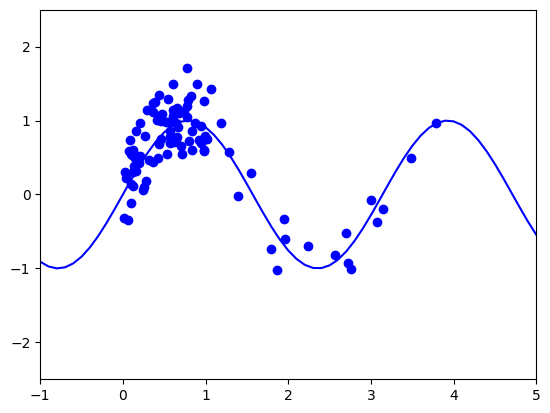

In [21]:
# データのプロット
fig, ax = plt.subplots()
ax.plot(xt, ft, color="blue")
ax.scatter(x, yx, color="blue")
ax.set_xlim(-1,5)
ax.set_ylim(-2.5, 2.5)

### 補助変数法のチェック

### GPyを用いた場合

In [48]:
# 描画用の関数
def make_fig(ax, x, xs, ys, m0, m1):
    def lu(y, v):
        return y - 2*np.sqrt(v), y + 2.*np.sqrt(v)

    y0, v0 = m0.predict(x.reshape(-1,1))
    y1, v1 = m1.predict(x.reshape(-1,1))
    
    y0_lower, y0_upper = lu(y0, v0)
    y1_lower, y1_upper = lu(y1, v1)

    ax.fill_between(x, y0_lower[:,0], y0_upper[:,0], color="blue", alpha=0.1)
    ax.plot(x, y0[:,0], color="blue")

    ax.fill_between(x, y1_lower[:,0], y1_upper[:,0], color="red", alpha=0.1)
    ax.plot(x, y1[:,0], color="red")

In [32]:
model = GPy.models.GPRegression(
    X=x.reshape(-1,1),
    Y=yx.reshape(-1,1),
    kernel=GPy.kern.RBF(1)
)
model.optimize()

In [33]:
M = 10

idx_z = np.random.permutation(x.shape[0])
z = x[idx_z[:10]]
x_sub = x[idx_z[:10]]
yx_sub = yx[idx_z[:10]]

In [34]:
# 部分データ法(subset of data approximation)
model_sod = GPy.models.GPRegression(
    X=x_sub.reshape(-1,1),
    Y=yx_sub.reshape(-1,1),
    kernel=GPy.kern.RBF(1)
)

model_sod.optimize()

In [35]:
# 補助変数法
model_sparce = GPy.models.SparseGPRegression(
    X=x.reshape(-1,1),
    Y=yx.reshape(-1,1),
    kernel=GPy.kern.RBF(1),
    Z=x.reshape(-1,1)
)

model_sparce.optimize()

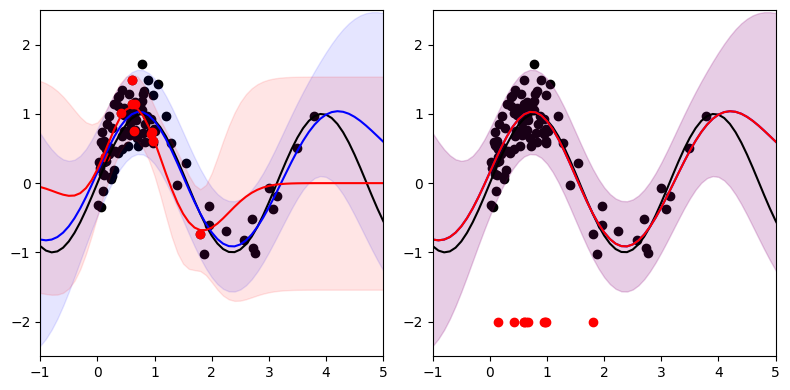

In [57]:
# 結果の描画
fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.plot(xt, ft, color="black")
ax1.scatter(x, yx, color="black")
make_fig(ax1, xt, xs=x_sub, ys=yx_sub, m0=model, m1=model_sod)
ax1.scatter(x_sub, yx_sub, color="red")
ax1.set_xlim(-1,5)
ax1.set_ylim(-2.5, 2.5)

ax2.plot(xt, ft, color="black")
ax2.scatter(x, yx, color="black")
make_fig(ax2, xt, xs=x_sub, ys=yx_sub, m0=model, m1=model_sparce)
ax2.scatter(x_sub, x_sub*0-2, color="red")
ax2.set_xlim(-1,5)
ax2.set_ylim(-2.5, 2.5)

fig.tight_layout()